In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Performance metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_auc_score,RocCurveDisplay,auc,roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support,plot_confusion_matrix,log_loss,accuracy_score,f1_score
import joblib

In [2]:
df = pd.read_csv("rainDS.csv")
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,day,RainTomorrow
0,12.2,19.6,0.0,2.600000,1.700000,11.0,37.0,6.0,10.0,15.0,...,1026.9,1024.400000,7.000000,7.000000,15.0,18.500000,0.0,5.0,12.0,1.0
1,15.6,25.6,0.0,6.475381,7.857188,9.0,52.0,1.0,9.0,20.0,...,1023.5,1020.800000,4.036764,4.155645,19.6,24.300000,0.0,2.0,9.0,0.0
2,7.1,14.2,0.0,3.000000,1.600000,10.0,39.0,14.0,13.0,20.0,...,1017.1,1015.670207,6.000000,7.382760,11.3,12.150888,0.0,6.0,16.0,1.0
3,7.6,15.8,1.2,1.233005,4.914109,15.0,52.0,3.0,12.0,0.0,...,1018.9,1018.400000,5.676354,5.775109,13.0,14.200000,1.0,6.0,3.0,1.0
4,17.8,27.6,0.0,5.200000,10.700000,9.0,33.0,10.0,9.0,17.0,...,1016.2,1013.600000,2.000000,2.000000,23.5,26.200000,0.0,7.0,21.0,0.0


In [3]:
df.shape

(44127, 23)

In [4]:
y = df['RainTomorrow']
x = df.loc[:, df.columns != 'RainTomorrow']

# RANDOMFOREST

In [28]:
rf_model = joblib.load("RainPredictModelRF.sav")
ypreds=rf_model.predict(x)
ypreds

[1. 0. 1. ... 1. 1. 1.]


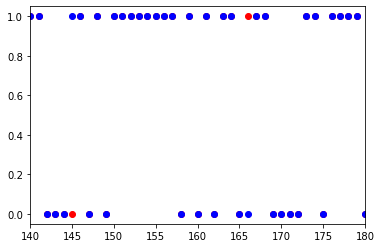

In [44]:
plt.scatter(range(len(y)),y,c='r')
plt.scatter(range(len(ypreds)),ypreds,c='b')


plt.xlim(140,180)
plt.show()

In [7]:
rf_model.score(x,y)

0.9309039816892152

In [8]:
f2=f1_score(y,rf_model.predict(x))
lgls=log_loss(y, rf_model.predict_proba(x))
acc_rf=accuracy_score(y, rf_model.predict(x))
rac=roc_auc_score(y, rf_model.predict(x))
f2,lgls,rac,acc_rf

(0.9328488051976656,
 0.2181580897425044,
 0.9309072752895674,
 0.9309039816892152)

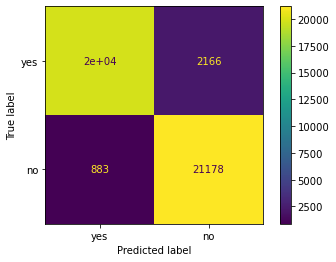

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y,rf_model.predict(x)),display_labels=['yes','no'])
disp.plot()
plt.show()

# XGBOOST

In [10]:
xgb_model = joblib.load("RainPredictModelXGB.sav")
xgb_model.predict(x)

array([1., 0., 1., ..., 1., 1., 1.])

In [11]:
xgb_model.score(x,y)

0.9637183583746912

In [12]:
f2=f1_score(y,xgb_model.predict(x))
lgls=log_loss(y, xgb_model.predict_proba(x))
acc_xgb=accuracy_score(y, xgb_model.predict(x))
rac=roc_auc_score(y, xgb_model.predict(x))
f2,lgls,rac,acc_xgb

(0.9644892979926806,
 0.11995878970120269,
 0.9637208307003282,
 0.9637183583746912)

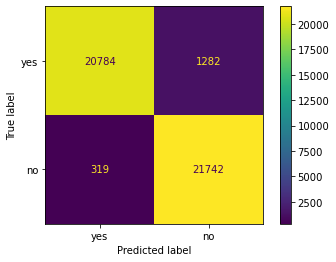

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y,xgb_model.predict(x)),display_labels=['yes','no'])
disp.plot()
plt.show()

# CATBOOST

In [14]:
cb_model = joblib.load("RainPredictModelCB.sav")
cb_model.predict(x)

array([1., 0., 1., ..., 1., 1., 1.])

In [15]:
cb_model.score(x,y)

0.9480590114895642

In [16]:
f2=f1_score(y,cb_model.predict(x))
lgls=log_loss(y, cb_model.predict_proba(x))
acc_cb=accuracy_score(y, cb_model.predict(x))
rac=roc_auc_score(y, cb_model.predict(x))
f2,lgls,rac,acc_cb

(0.9497522690402069,
 0.14613725463503874,
 0.9480628419803822,
 0.9480590114895642)

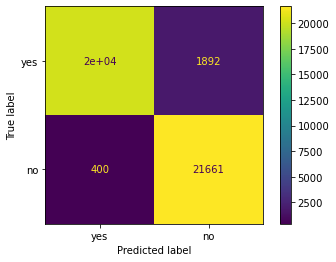

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y,cb_model.predict(x)),display_labels=['yes','no'])
disp.plot()
plt.show()

# ENSEMBLE MODEL

In [18]:
def Ensemble_Model(x,model1,model2,model3):
    pred=[]
    l1=model1.predict(x)
    l2=model2.predict(x)
    l3=model3.predict(x)
    for i in range(len(l1)):
            pred.append(max([l1[i],l2[i],l3[i]], key = [l1[i],l2[i],l3[i]].count))
    pred=np.array(pred)
    return pred

In [19]:
f2=f1_score(y,Ensemble_Model(x,rf_model,xgb_model,cb_model))
lgls=log_loss(y, Ensemble_Model(x,rf_model,xgb_model,cb_model))
acc_en=accuracy_score(y, Ensemble_Model(x,rf_model,xgb_model,cb_model))
rac=roc_auc_score(y, Ensemble_Model(x,rf_model,xgb_model,cb_model))
f2,lgls,rac,acc_en


(0.9572935709094113,
 1.5177096739319345,
 0.9560619376874795,
 0.9560586488997665)

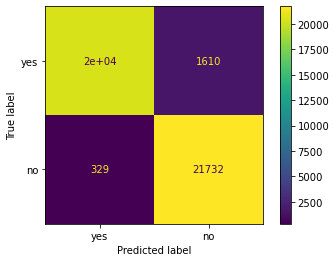

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y,Ensemble_Model(x,rf_model,xgb_model,cb_model)),display_labels=['yes','no'])
disp.plot()
plt.show()

C:\Users\JYOTHI~1\AppData\Local\Temp/ipykernel_4596/838622510.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i,l[i]//2,round(l[i],2),ha='center',Bbox = dict(facecolor = 'white', alpha =1))


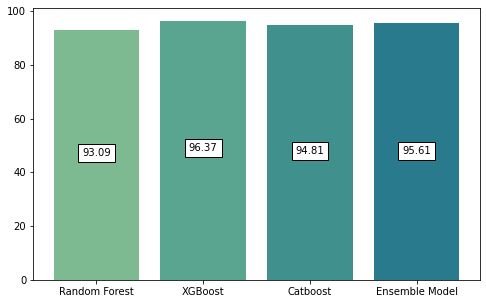

In [21]:
import seaborn as sns
l=[acc_rf,acc_xgb,acc_cb,acc_en]
l=[i*100 for i in l]
n=['Random Forest','XGBoost','Catboost','Ensemble Model']
plt.figure(figsize=(8,5))
plt.bar(n,l,color=sns.color_palette("crest"))
for i in range(4):
    plt.text(i,l[i]//2,round(l[i],2),ha='center',Bbox = dict(facecolor = 'white', alpha =1))

plt.show()

# End of the Notebook

# Notebook Details

Notebook by: Chelluboina Jyothi Swarup<br>
Reg no.: 39110220<br>
Dataset: Prediction of Rainfall<br>
Problem Type: Classification